<a href="https://colab.research.google.com/github/xorToja/data-science-bootcamp/blob/master/08_computer_vision/01_recnatgle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import cv2
from google.colab.patches import cv2_imshow
import imutils

cv2.__version__



'4.1.2'

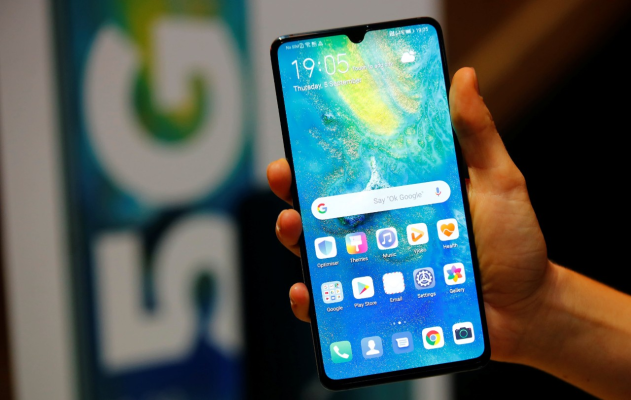

In [2]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

# Konwersja do odcieni szarości

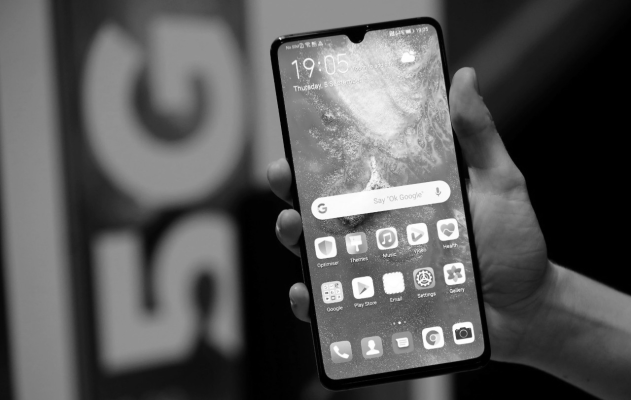

In [3]:
gray_image = cv2.cvtColor(src = image, code = cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

# Detekcja krawędzi

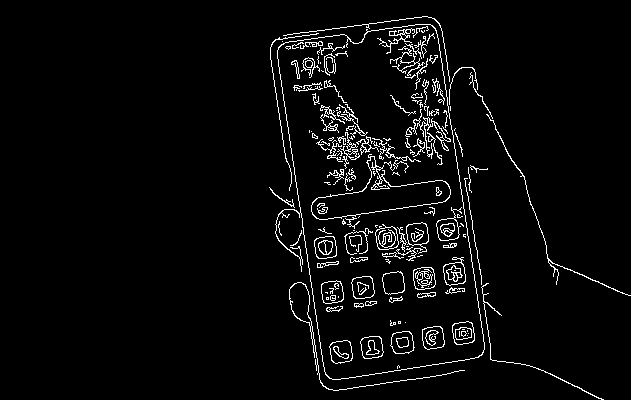

In [5]:
edges1 = cv2.Canny(image = gray_image, threshold1 = 70, threshold2 = 200)
cv2_imshow(edges1)

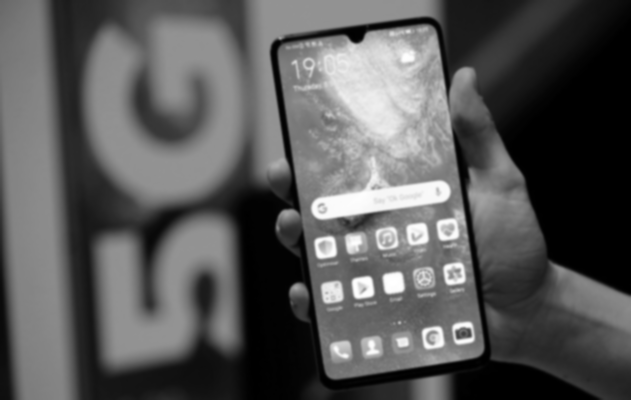

In [6]:
gray_image = cv2.GaussianBlur(src = gray_image, ksize = (5,5), sigmaX = 0)
cv2_imshow(gray_image)

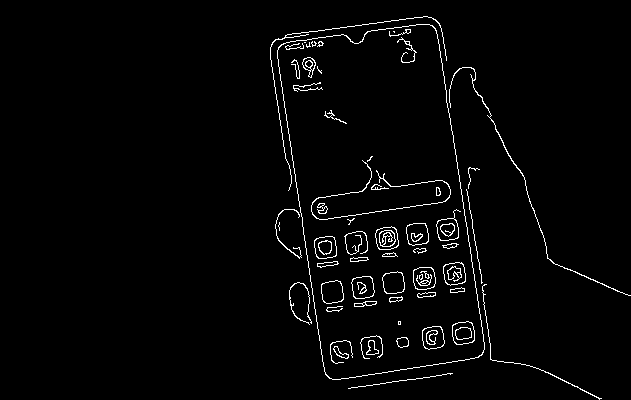

In [7]:
edges = cv2.Canny(image = gray_image, threshold1 = 70, threshold2 = 200)
cv2_imshow(edges)

# Detekcja konturu

In [8]:
contours = cv2.findContours(image = edges.copy(),
                            mode = cv2.RETR_TREE,
                            method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:10]

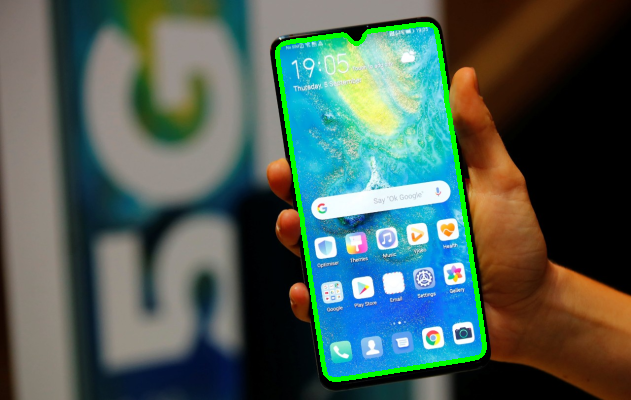

In [9]:
cnt1 = cv2.drawContours(image = image.copy(), contours=[contours[0]], contourIdx = -1, color=(0,255,0), thickness=3)
cv2_imshow(cnt1)

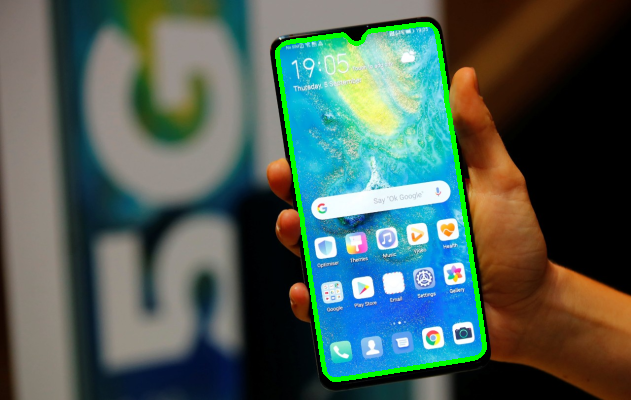

In [11]:
cnt2 = cv2.drawContours(image = image.copy(), contours=[contours[1]], contourIdx = -1, color=(0,255,0), thickness=3)
cv2_imshow(cnt2)

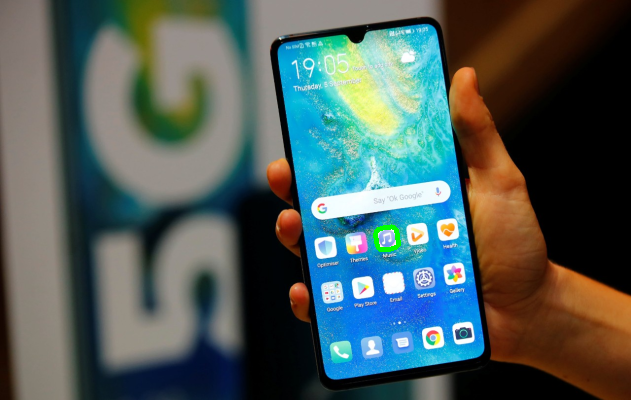

In [12]:
cnt3 = cv2.drawContours(image = image.copy(), contours=[contours[2]], contourIdx = -1, color=(0,255,0), thickness=3)
cv2_imshow(cnt3)

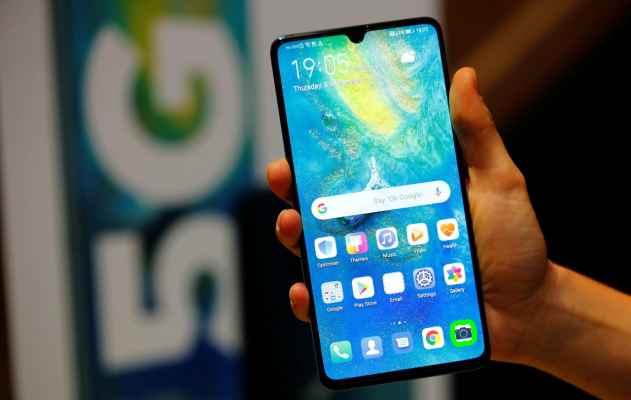

In [13]:
cnt4 = cv2.drawContours(image = image.copy(), contours=[contours[3]], contourIdx = -1, color=(0,255,0), thickness=3)
cv2_imshow(cnt4)

# Detekcja prostokąta

In [16]:
screen_contour = None
for contour in contours:
  perimeter = cv2.arcLength(curve = contour, closed = True)
  approx = cv2.approxPolyDP(curve=contour, epsilon = 0.015 * perimeter, closed = True)

  if len(approx) == 4:
    screen_contour = approx
    break

In [17]:
screen_contour

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

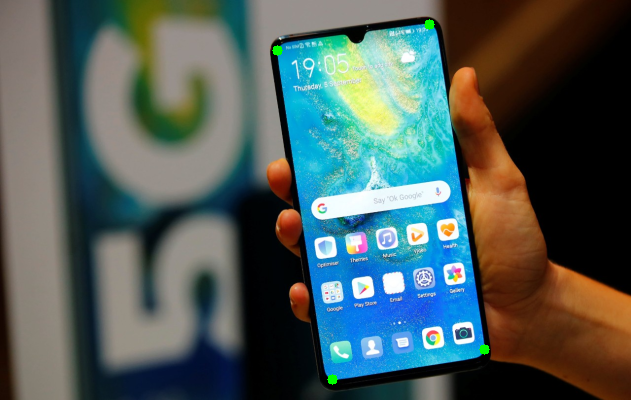

In [18]:
vertices = cv2.drawContours(image = image.copy(), contours = screen_contour, contourIdx = -1, color=(0,255,0), thickness = 10)
cv2_imshow(vertices)

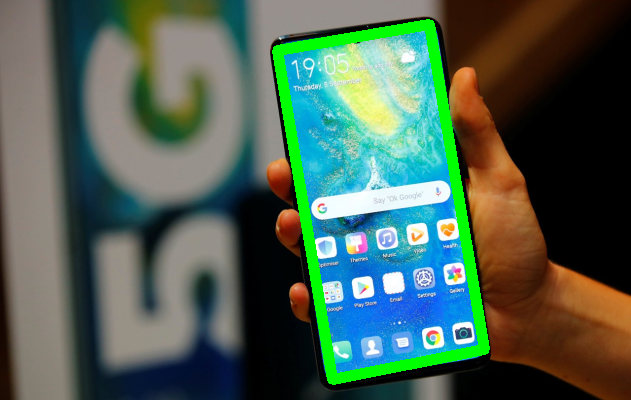

In [19]:
vertices = cv2.drawContours(image = image.copy(), contours = [screen_contour], contourIdx = -1, color=(0,255,0), thickness = 10)
cv2_imshow(vertices)

# Wyświetlenie znalezionego kształtu

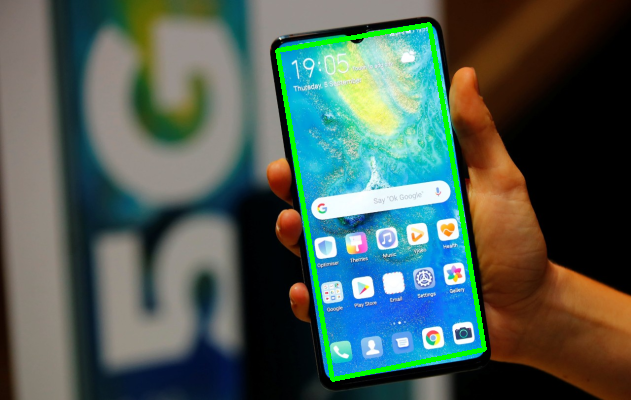

In [21]:
screen_contour = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(screen_contour)